In [1]:
import pandas as pd
import numpy as np

In [184]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [100]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
def transformar_sex(x):
    if x == 'female':
        return 1
    else:
            return 0

In [102]:
train['sex_binario'] = train.Sex.map(transformar_sex)

test['sex_binario'] = test.Sex.map(transformar_sex)

In [54]:
variaveis = ['sex_binario','Age']

In [55]:
X= train[variaveis]
y = train['Survived']

In [59]:
X = X.fillna(-1)

In [53]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split

In [107]:
X_train,X_val, y_train,y_val = train_test_split(X,y,test_size=0.2)

In [61]:
modelo = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)

In [62]:
modelo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [64]:
p = modelo.predict(X_val)

In [65]:
np.mean(y_val == p)

0.7597765363128491

### X Validation

In [78]:
from sklearn.model_selection import RepeatedKFold

In [81]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=0)

for linhas_train,linhas_val in kf.split(X):
    print("treino",linhas_train.shape[0])
    print("validacao",linhas_val.shape[0])
    
    X_train,X_val = X.iloc[linhas_train],X.iloc[linhas_val]
    y_train,y_val = y.iloc[linhas_train],y.iloc[linhas_val]
    
    modelo = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)
    modelo.fit(X_train,y_train)
    
    p = modelo.predict(X_val)
    
    acc = np.mean(y_val == p)
    resultados.append(acc)
    
    print('acc',acc)
    print(" ")

treino 445
validacao 446
acc 0.7713004484304933
 
treino 446
validacao 445
acc 0.7797752808988764
 
treino 445
validacao 446
acc 0.7331838565022422
 
treino 446
validacao 445
acc 0.7640449438202247
 
treino 445
validacao 446
acc 0.7466367713004485
 
treino 446
validacao 445
acc 0.7617977528089888
 
treino 445
validacao 446
acc 0.757847533632287
 
treino 446
validacao 445
acc 0.7617977528089888
 
treino 445
validacao 446
acc 0.757847533632287
 
treino 446
validacao 445
acc 0.7707865168539326
 
treino 445
validacao 446
acc 0.7466367713004485
 
treino 446
validacao 445
acc 0.7617977528089888
 
treino 445
validacao 446
acc 0.7645739910313901
 
treino 446
validacao 445
acc 0.7685393258426966
 
treino 445
validacao 446
acc 0.7399103139013453
 
treino 446
validacao 445
acc 0.7707865168539326
 
treino 445
validacao 446
acc 0.7399103139013453
 
treino 446
validacao 445
acc 0.7393258426966293
 
treino 445
validacao 446
acc 0.742152466367713
 
treino 446
validacao 445
acc 0.7730337078651686
 


In [84]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\lucaskenjis\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([1., 4., 2., 0., 0., 2., 5., 1., 4., 1.]),
 array([0.73318386, 0.737843  , 0.74250214, 0.74716128, 0.75182043,
        0.75647957, 0.76113871, 0.76579785, 0.770457  , 0.77511614,
        0.77977528]),
 <a list of 10 Patch objects>)

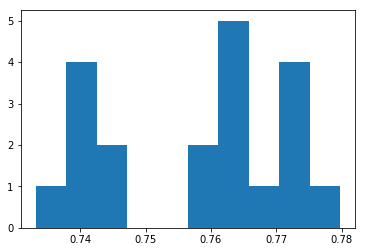

In [85]:
pylab.hist(resultados)

In [86]:
np.mean(resultados)

0.7575842696629215

### Novas Variaveis

In [91]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'sex_binario'],
      dtype='object')

In [139]:
variaveis = ['sex_binario', 'Age', 'SibSp','Parch','Pclass','Fare']

In [109]:
X= train[variaveis].fillna(-1)
y = train['Survived']

In [95]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=0)

for linhas_train,linhas_val in kf.split(X):
    print("treino",linhas_train.shape[0])
    print("validacao",linhas_val.shape[0])
    
    X_train,X_val = X.iloc[linhas_train],X.iloc[linhas_val]
    y_train,y_val = y.iloc[linhas_train],y.iloc[linhas_val]
    
    modelo = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)
    modelo.fit(X_train,y_train)
    
    p = modelo.predict(X_val)
    
    acc = np.mean(y_val == p)
    resultados.append(acc)
    
    print('acc',acc)
    print(" ")

treino 445
validacao 446
acc 0.7825112107623319
 
treino 446
validacao 445
acc 0.8269662921348314
 
treino 445
validacao 446
acc 0.8004484304932735
 
treino 446
validacao 445
acc 0.8067415730337079
 
treino 445
validacao 446
acc 0.8071748878923767
 
treino 446
validacao 445
acc 0.8
 
treino 445
validacao 446
acc 0.8026905829596412
 
treino 446
validacao 445
acc 0.7887640449438202
 
treino 445
validacao 446
acc 0.7757847533632287
 
treino 446
validacao 445
acc 0.8179775280898877
 
treino 445
validacao 446
acc 0.7892376681614349
 
treino 446
validacao 445
acc 0.8314606741573034
 
treino 445
validacao 446
acc 0.7892376681614349
 
treino 446
validacao 445
acc 0.7932584269662921
 
treino 445
validacao 446
acc 0.7847533632286996
 
treino 446
validacao 445
acc 0.8134831460674158
 
treino 445
validacao 446
acc 0.8004484304932735
 
treino 446
validacao 445
acc 0.7797752808988764
 
treino 445
validacao 446
acc 0.8228699551569507
 
treino 446
validacao 445
acc 0.8112359550561797
 


(array([2., 2., 3., 1., 4., 2., 2., 1., 1., 2.]),
 array([0.77578475, 0.78135235, 0.78691994, 0.79248753, 0.79805512,
        0.80362271, 0.80919031, 0.8147579 , 0.82032549, 0.82589308,
        0.83146067]),
 <a list of 10 Patch objects>)

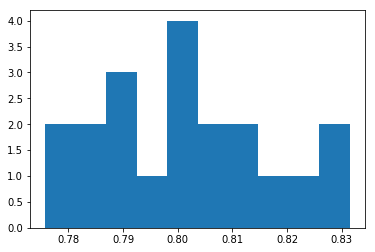

In [96]:
pyplot.hist(resultados)

In [119]:
np.mean(resultados)

0.801240993601048

In [117]:
modelo_v2 = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)
modelo_v2.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [118]:
p = modelo_v2.predict(test[variaveis].fillna(-1))

### Analise de Erro

In [120]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=0)

for linhas_train,linhas_val in kf.split(X):
    print("treino",linhas_train.shape[0])
    print("validacao",linhas_val.shape[0])
    
    X_train,X_val = X.iloc[linhas_train],X.iloc[linhas_val]
    y_train,y_val = y.iloc[linhas_train],y.iloc[linhas_val]
    
    modelo = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)
    modelo.fit(X_train,y_train)
    
    p = modelo.predict(X_val)
    
    acc = np.mean(y_val == p)
    resultados.append(acc)
    
    print('acc',acc)
    print(" ")

treino 445
validacao 446
acc 0.7825112107623319
 
treino 446
validacao 445
acc 0.8269662921348314
 
treino 445
validacao 446
acc 0.8004484304932735
 
treino 446
validacao 445
acc 0.8067415730337079
 
treino 445
validacao 446
acc 0.8071748878923767
 
treino 446
validacao 445
acc 0.8
 
treino 445
validacao 446
acc 0.8026905829596412
 
treino 446
validacao 445
acc 0.7887640449438202
 
treino 445
validacao 446
acc 0.7757847533632287
 
treino 446
validacao 445
acc 0.8179775280898877
 
treino 445
validacao 446
acc 0.7892376681614349
 
treino 446
validacao 445
acc 0.8314606741573034
 
treino 445
validacao 446
acc 0.7892376681614349
 
treino 446
validacao 445
acc 0.7932584269662921
 
treino 445
validacao 446
acc 0.7847533632286996
 
treino 446
validacao 445
acc 0.8134831460674158
 
treino 445
validacao 446
acc 0.8004484304932735
 
treino 446
validacao 445
acc 0.7797752808988764
 
treino 445
validacao 446
acc 0.8228699551569507
 
treino 446
validacao 445
acc 0.8112359550561797
 


In [121]:
x_val_check = train.iloc[linhas_val].copy()
x_val_check['p'] = p
x_val_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0


In [122]:
erros = x_val_check[x_val_check['p'] != x_val_check['Survived']]

In [123]:
erros.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_binario,p
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,1,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,0


In [124]:
mulheres = erros[erros['Sex']=='female']
homens = erros[erros['Sex']=='male']

In [125]:
mulheres.sort_values('Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_binario,p
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,1,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S,1,1
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.00,1,0,244252,26.0000,NaN,S,1,1
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.00,0,0,4135,9.5875,NaN,S,1,1
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.00,4,2,347082,31.2750,NaN,S,1,1
772,773,0,2,"Mack, Mrs. (Mary)",female,57.00,0,0,S.O./P.P. 3,10.5000,E77,S,1,1
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.00,0,0,237671,13.0000,NaN,S,1,1
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.00,0,0,248747,13.0000,NaN,S,1,1
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S,1,1
501,502,0,3,"Canavan, Miss. Mary",female,21.00,0,0,364846,7.7500,NaN,Q,1,1


In [126]:
homens.sort_values('Survived')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_binario,p
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,WE/P 5735,71.0000,B22,S,0,1
499,500,0,3,"Svensson, Mr. Olof",male,24.00,0,0,350035,7.7958,NaN,S,0,1
382,383,0,3,"Tikkanen, Mr. Juho",male,32.00,0,0,STON/O 2. 3101293,7.9250,NaN,S,0,1
395,396,0,3,"Johansson, Mr. Erik",male,22.00,0,0,350052,7.7958,NaN,S,0,1
434,435,0,1,"Silvey, Mr. William Baird",male,50.00,1,0,13507,55.9000,E44,S,0,1
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C,0,1
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.00,1,1,C.A. 33112,36.7500,NaN,S,0,1
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S,0,1
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S,0,1
834,835,0,3,"Allum, Mr. Owen George",male,18.00,0,0,2223,8.3000,NaN,S,0,1


### Criacao de novas Variaveis

In [130]:
train['Embarked_S'] = (train['Embarked']== 'S').astype(int)
train['Embarked_C'] = (train['Embarked']== 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked']== 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains('Mrs').astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [140]:
variaveis = variaveis + ['Embarked_S','Embarked_C','Cabine_nula','Nome_contem_Miss','Nome_contem_Mrs',
            'Nome_contem_Master','Nome_contem_Col','Nome_contem_Major','Nome_contem_Mr']

In [141]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [142]:
resultados = []
kf = RepeatedKFold(n_splits=2,n_repeats=10,random_state=0)

for linhas_train,linhas_val in kf.split(X):
    print("treino",linhas_train.shape[0])
    print("validacao",linhas_val.shape[0])
    
    X_train,X_val = X.iloc[linhas_train],X.iloc[linhas_val]
    y_train,y_val = y.iloc[linhas_train],y.iloc[linhas_val]
    
    modelo = rfc(n_estimators = 100 , n_jobs = 1, random_state=0)
    modelo.fit(X_train,y_train)
    
    p = modelo.predict(X_val)
    
    acc = np.mean(y_val == p)
    resultados.append(acc)
    
    print('acc',acc)
    print(" ")

treino 445
validacao 446
acc 0.7982062780269058
 
treino 446
validacao 445
acc 0.8179775280898877
 
treino 445
validacao 446
acc 0.8004484304932735
 
treino 446
validacao 445
acc 0.802247191011236
 
treino 445
validacao 446
acc 0.7937219730941704
 
treino 446
validacao 445
acc 0.797752808988764
 
treino 445
validacao 446
acc 0.804932735426009
 
treino 446
validacao 445
acc 0.797752808988764
 
treino 445
validacao 446
acc 0.7825112107623319
 
treino 446
validacao 445
acc 0.8202247191011236
 
treino 445
validacao 446
acc 0.8071748878923767
 
treino 446
validacao 445
acc 0.8134831460674158
 
treino 445
validacao 446
acc 0.8116591928251121
 
treino 446
validacao 445
acc 0.8112359550561797
 
treino 445
validacao 446
acc 0.8139013452914798
 
treino 446
validacao 445
acc 0.8269662921348314
 
treino 445
validacao 446
acc 0.8116591928251121
 
treino 446
validacao 445
acc 0.7617977528089888
 
treino 445
validacao 446
acc 0.8139013452914798
 
treino 446
validacao 445
acc 0.8067415730337079
 


In [143]:
np.mean(resultados)

0.8047148183604576

### Escolhendo os algoritmos 

In [158]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [159]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 84.53
Accuracy CV 10-Fold: 83.41
Running Time: 0:00:02.218069


In [160]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 77.35
Accuracy CV 10-Fold: 63.68
Running Time: 0:00:00.092778


In [161]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 80.94
Accuracy CV 10-Fold: 76.23
Running Time: 0:00:00.047851


In [162]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 80.27
Accuracy CV 10-Fold: 77.35
Running Time: 0:00:00.125664


C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [163]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.88
Accuracy CV 10-Fold: 78.25
Running Time: 0:00:00.053856


In [164]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 94.39
Accuracy CV 10-Fold: 83.41
Running Time: 0:00:00.299227


In [173]:
# Random Forest Classifier
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 98.88
Accuracy CV 10-Fold: 80.27
Running Time: 0:00:00.367989


In [179]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb, acc_xgb, acc_cv_xgb = fit_ml_algo(XGBClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Accuracy: 92.6
Accuracy CV 10-Fold: 82.06
Running Time: 0:00:02.916405


In [185]:
#Light GBM Classifier
start_time = time.time()
train_pred_lgbm, acc_lgbm, acc_cv_lgbm = fit_ml_algo(LGBMClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
lgbm_time = (time.time() - start_time)
print("Accuracy: %s" % acc_lgbm)
print("Accuracy CV 10-Fold: %s" % acc_cv_lgbm)
print("Running Time: %s" % datetime.timedelta(seconds=lgbm_time))

Accuracy: 95.07
Accuracy CV 10-Fold: 81.17
Running Time: 0:00:00.177524


### Regular accuracy scores

In [186]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes','Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'Random Forest','XGBoost','Light GBM'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_rf,
        acc_xgb,
        acc_lgbm
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,98.88
6,Random Forest,98.88
8,Light GBM,95.07
5,Gradient Boosting Trees,94.39
7,XGBoost,92.60
1,Logistic Regression,84.53
2,Naive Bayes,80.94
3,Linear SVC,80.27
0,KNN,77.35


In [187]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes','Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'Random Forest','XGBoost','Light GBM'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_rf,
        acc_cv_xgb,
        acc_cv_lgbm
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
1,Logistic Regression,83.41
5,Gradient Boosting Trees,83.41
7,XGBoost,82.06
4,Decision Tree,81.61
8,Light GBM,81.17
6,Random Forest,80.27
3,Linear SVC,77.35
2,Naive Bayes,76.23
0,KNN,63.68


### Optimizer Paramenters Example

In [188]:
?LGBMClassifier

##### Random Search

In [191]:
from skopt import dummy_minimize

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [195]:
def treinar_modelo(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1, 
                         n_estimators=100)
    mdl.fit(X, y)
    
    p = mdl.predict(X_val)
    
    return metrics.accuracy_score(y_val, p)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0439
Function value obtained: 0.8742
Current minimum: 0.8742
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0239
Function value obtained: 0.6315
Current minimum: 0.6315
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0459
Function value obtained: 0.8315
Current minimum: 0.6315
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken

In [196]:
resultado.x

[0.07015345605895347, 11, 67, 0.16805741387355647, 0.11789212045581604]

In [197]:
from skopt import gp_minimize

resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0668
Function value obtained: 0.9169
Current minimum: 0.9169
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0389
Function value obtained: 0.7775
Current minimum: 0.7775
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0240
Function value obtained: 0.6652
Current minimum: 0.6652
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0

In [198]:
resultados_gp.x

[0.0019241559628256106, 101, 42, 0.0824627456265471, 0.661626987829618]

### Criando Arquivo de predict

In [46]:
sub = pd.Series(p,index = test['PassengerId'],name= 'Survived')

In [47]:
sub.head()

PassengerId
892    0
893    1
894    0
895    1
896    1
Name: Survived, dtype: int64

In [48]:
sub.to_csv('primeiro_modelo.csv',header=True)

In [49]:
pm = pd.read_csv('primeiro_modelo.csv')

In [50]:
pm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
